<a href="https://colab.research.google.com/github/yaswanth-kumar-n/NFCC_Research/blob/main/NFCC_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

# Your CFBD API key
api_key = 'mn8My2+XpGsfIACLnS4HEYD+ChTrShe5hXUYC2uKjG3G6Iln7ISP43NuLo3TZ2P9'

# Base URL for CFBD API
base_url = "https://api.collegefootballdata.com/plays"

# Parameters for Week 3 and Week 2 (no filtering by playType yet)
params_week_3 = {
    'seasonType': 'regular',
    'year': 2023,
    'week': 3,
    'classification': 'fbs'
}

params_week_2 = {
    'seasonType': 'regular',
    'year': 2023,
    'week': 2,
    'classification': 'fbs'
}

# Headers with API key for authentication
headers = {
    'Authorization': f'Bearer {api_key}'
}

# Function to get data from the API
def get_data(params):
    response = requests.get(base_url, params=params, headers=headers)
    if response.status_code == 200:
        return response.json()  # Return data as JSON
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return None

# Fetch data for Week 3 and Week 2
week_3_data = get_data(params_week_3)
week_2_data = get_data(params_week_2)

# Convert the JSON data for both weeks into DataFrames
def convert_to_dataframe(data, week_number):
    if data:
        # Add a 'week' column to distinguish between weeks
        for play in data:
            play['week'] = week_number
        return pd.DataFrame(data)
    else:
        return pd.DataFrame()

# Convert both weeks' data into DataFrames
week_3_df = convert_to_dataframe(week_3_data, 3)
week_2_df = convert_to_dataframe(week_2_data, 2)

# Combine the data into a single DataFrame
mixed_data_df = pd.concat([week_3_df, week_2_df], ignore_index=True)

# Filter the data to include only the relevant play types
relevant_play_types = [
    "Field Goal Good",
    "Field Goal Missed",
    "Blocked Field Goal",
    "Blocked Field Goal Touchdown",
    "Missed Field Goal Return"  # Added this play type
]

# Filter the data based on the 'play_type' column
filtered_data_df = mixed_data_df[mixed_data_df['play_type'].isin(relevant_play_types)]

# Display the filtered data
print(filtered_data_df.head())  # This will display the first few rows of the filtered data


                     id   offense offense_conference   defense  \
53   401520219102909601   Arizona             Pac-12      UTEP   
61   401520219102948601      UTEP     Conference USA   Arizona   
99   401520219103914001   Arizona             Pac-12      UTEP   
257  401520220102999901  Arkansas                SEC       BYU   
289  401520220103955601       BYU             Big 12  Arkansas   

    defense_conference      home  away  offense_score  defense_score  \
53      Conference USA   Arizona  UTEP              7              0   
61              Pac-12   Arizona  UTEP              3              7   
99      Conference USA   Arizona  UTEP             17              3   
257             Big 12  Arkansas   BYU             24             21   
289                SEC  Arkansas   BYU             24             31   

       game_id  ... yards_to_goal  down  distance  scoring yards_gained  \
53   401520219  ...            28     4         6    False           45   
61   401520219  ... 

               total_attempts  successful_attempts  missed_attempts  \
yards_to_goal                                                         
0                           1                    1                0   
1                           1                    1                0   
2                           7                    7                0   
3                           5                    4                0   
4                           9                    9                0   

               probability_of_success  
yards_to_goal                          
0                                 1.0  
1                                 1.0  
2                                 1.0  
3                                 0.8  
4                                 1.0  


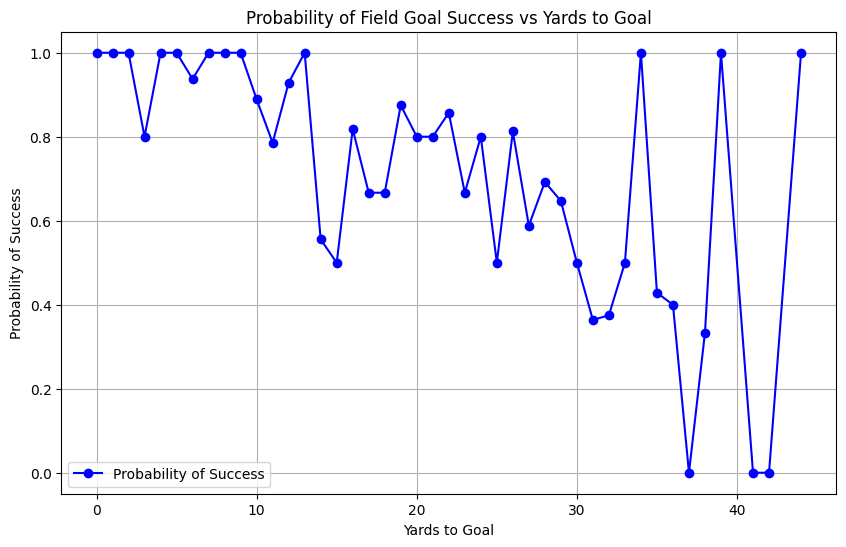

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to only include successful and missed field goals
field_goal_data = filtered_data_df[filtered_data_df['play_type'].isin(['Field Goal Good', 'Field Goal Missed', 'Blocked Field Goal'])]

# Group by 'yards_to_goal' and calculate success rate (including "Field Goal Missed")
probability_data = field_goal_data.groupby('yards_to_goal').agg(
    total_attempts=('play_type', 'size'),  # Total number of attempts (good + missed)
    successful_attempts=('play_type', lambda x: (x == 'Field Goal Good').sum()),  # Successful field goals (good)
    missed_attempts=('play_type', lambda x: (x == 'Field Goal Missed').sum())  # Missed field goals
)

# Calculate the probability of success for each distance
probability_data['probability_of_success'] = probability_data['successful_attempts'] / probability_data['total_attempts']

# Display the result
print(probability_data.head())  # Display the first few rows to see the probabilities

# Optionally, you can plot the probability vs yards to goal if needed:
plt.figure(figsize=(10, 6))
plt.plot(probability_data.index, probability_data['probability_of_success'], marker='o', linestyle='-', color='b', label='Probability of Success')
plt.title('Probability of Field Goal Success vs Yards to Goal')
plt.xlabel('Yards to Goal')
plt.ylabel('Probability of Success')
plt.grid(True)
plt.legend()
plt.show()


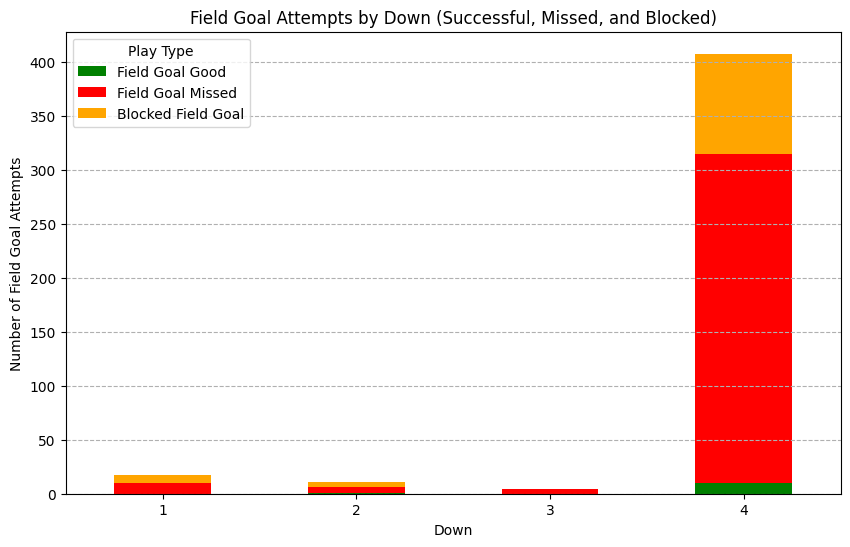

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to only include successful and missed field goals
field_goal_data = filtered_data_df[filtered_data_df['play_type'].isin(['Field Goal Good', 'Field Goal Missed', 'Blocked Field Goal'])]

# Group by 'yards_to_goal' and calculate success rate (including "Field Goal Missed")
probability_data = field_goal_data.groupby('yards_to_goal').agg(
    total_attempts=('play_type', 'size'),  # Total number of attempts (good + missed)
    successful_attempts=('play_type', lambda x: (x == 'Field Goal Good').sum()),  # Successful field goals (good)
    missed_attempts=('play_type', lambda x: (x == 'Field Goal Missed').sum())  # Missed field goals
)

# Calculate the probability of success for each distance
probability_data['probability_of_success'] = probability_data['successful_attempts'] / probability_data['total_attempts']

# Display the result
print(probability_data.head())  # Display the first few rows to see the probabilities

# Optionally, you can plot the probability vs yards to goal if needed:
plt.figure(figsize=(10, 6))
plt.plot(probability_data.index, probability_data['probability_of_success'], marker='o', linestyle='-', color='b', label='Probability of Success')
plt.title('Probability of Field Goal Success vs Yards to Goal')
plt.xlabel('Yards to Goal')
plt.ylabel('Probability of Success')
plt.grid(True)
plt.legend()
plt.show()



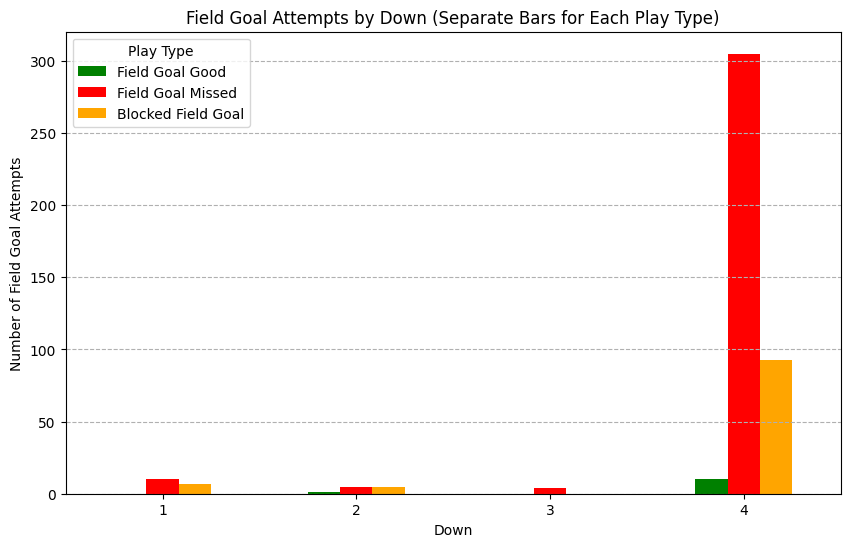

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to only include successful, missed, and blocked field goals
field_goal_data = filtered_data_df[filtered_data_df['play_type'].isin(['Field Goal Good', 'Field Goal Missed', 'Blocked Field Goal'])]

# Remove rows where down is 0 (invalid down)
field_goal_data_no_zero_down = field_goal_data[field_goal_data['down'] != 0]

# Group by down and play type, then count the occurrences
down_grouped = field_goal_data_no_zero_down.groupby(['down', 'play_type']).size().unstack(fill_value=0)

# Plot the grouped bar graph (separate bars for each play type per down)
down_grouped.plot(kind='bar', figsize=(10, 6), color=['green', 'red', 'orange'])

# Customize the plot
plt.title('Field Goal Attempts by Down (Separate Bars for Each Play Type)')
plt.xlabel('Down')
plt.ylabel('Number of Field Goal Attempts')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(title="Play Type", labels=['Field Goal Good', 'Field Goal Missed', 'Blocked Field Goal'])
plt.grid(True, axis='y', linestyle='--')

# Show the plot
plt.show()


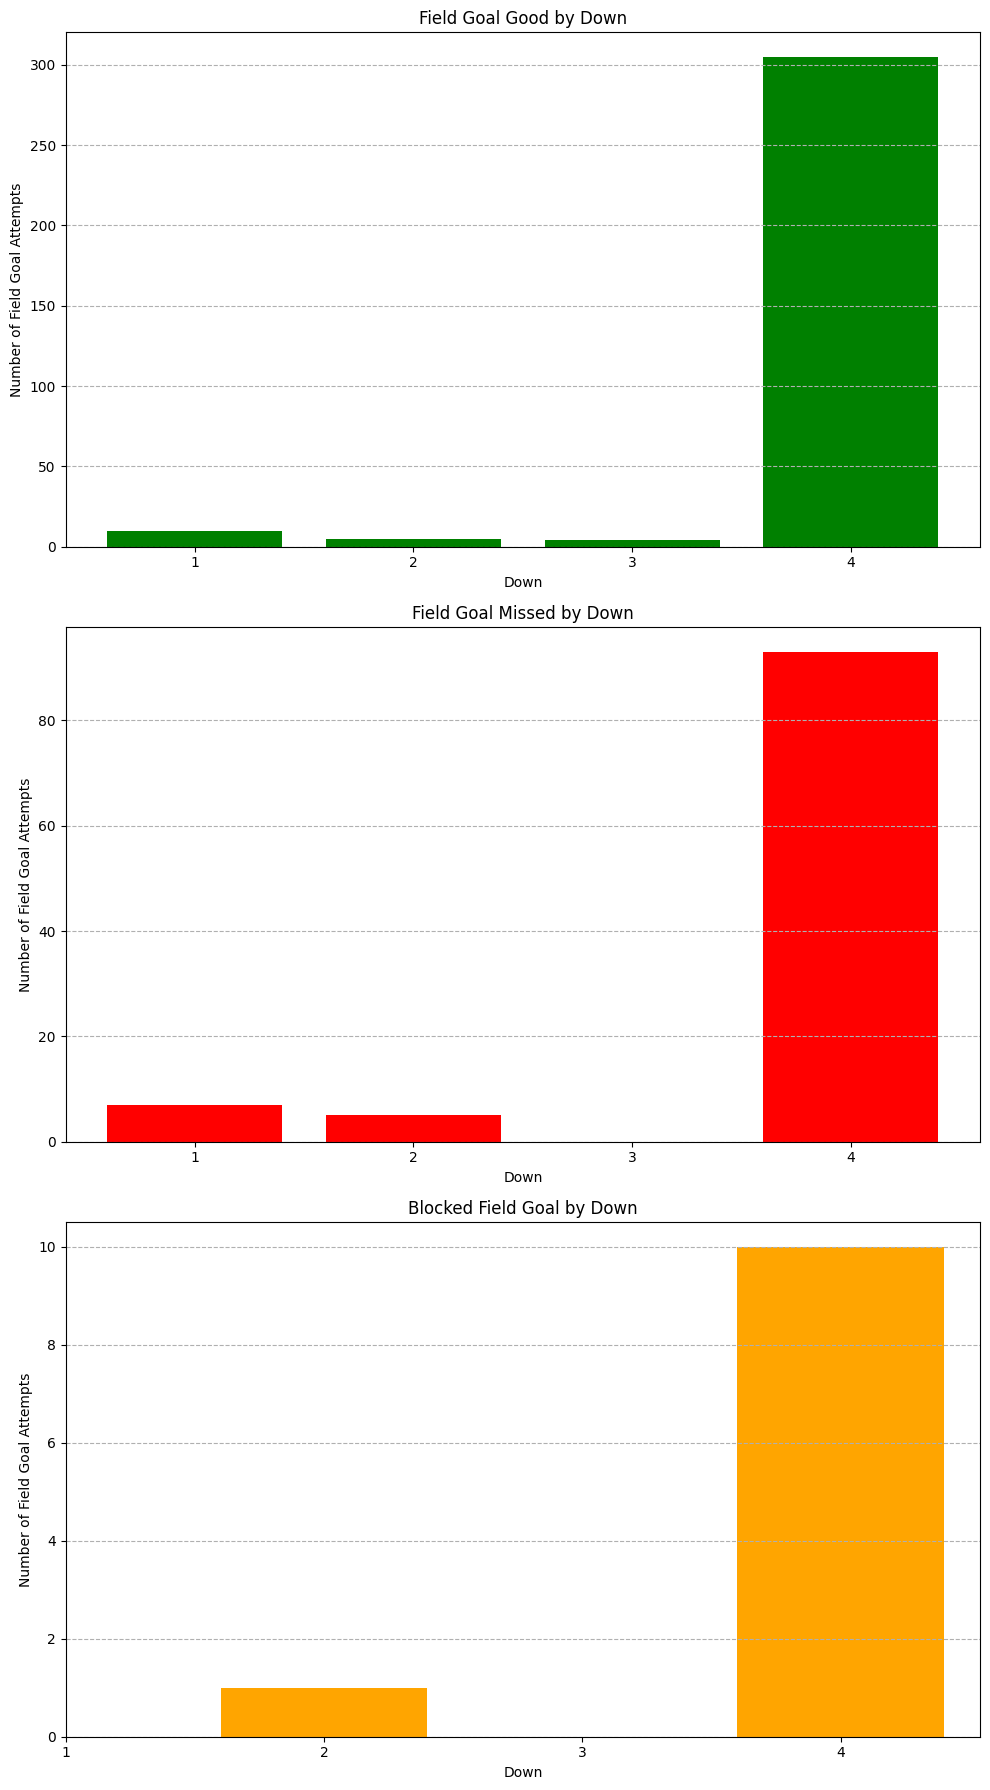

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to only include specific field goal types
field_goal_good = filtered_data_df[filtered_data_df['play_type'] == 'Field Goal Good']
field_goal_missed = filtered_data_df[filtered_data_df['play_type'] == 'Field Goal Missed']
blocked_field_goal = filtered_data_df[filtered_data_df['play_type'] == 'Blocked Field Goal']

# Remove rows where down is 0 (invalid down)
field_goal_good_no_zero_down = field_goal_good[field_goal_good['down'] != 0]
field_goal_missed_no_zero_down = field_goal_missed[field_goal_missed['down'] != 0]
blocked_field_goal_no_zero_down = blocked_field_goal[blocked_field_goal['down'] != 0]

# Group by down and count the occurrences for each play type
down_grouped_good = field_goal_good_no_zero_down.groupby('down').size()
down_grouped_missed = field_goal_missed_no_zero_down.groupby('down').size()
down_grouped_blocked = blocked_field_goal_no_zero_down.groupby('down').size()

# Create three separate bar plots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot for "Field Goal Good"
axes[0].bar(down_grouped_good.index, down_grouped_good.values, color='green')
axes[0].set_title('Field Goal Good by Down')
axes[0].set_xlabel('Down')
axes[0].set_ylabel('Number of Field Goal Attempts')
axes[0].set_xticks([1, 2, 3, 4])  # Ensure x-ticks only show 1, 2, 3, and 4
axes[0].grid(True, axis='y', linestyle='--')

# Plot for "Field Goal Missed"
axes[1].bar(down_grouped_missed.index, down_grouped_missed.values, color='red')
axes[1].set_title('Field Goal Missed by Down')
axes[1].set_xlabel('Down')
axes[1].set_ylabel('Number of Field Goal Attempts')
axes[1].set_xticks([1, 2, 3, 4])  # Ensure x-ticks only show 1, 2, 3, and 4
axes[1].grid(True, axis='y', linestyle='--')

# Plot for "Blocked Field Goal"
axes[2].bar(down_grouped_blocked.index, down_grouped_blocked.values, color='orange')
axes[2].set_title('Blocked Field Goal by Down')
axes[2].set_xlabel('Down')
axes[2].set_ylabel('Number of Field Goal Attempts')
axes[2].set_xticks([1, 2, 3, 4])  # Ensure x-ticks only show 1, 2, 3, and 4
axes[2].grid(True, axis='y', linestyle='--')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show all plots
plt.show()


In [ ]:
!git checkout -b main
